In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import mat
import pandas as pd
# import seaborn as sns

from fractions import Fraction
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
init_notebook_mode(connected=True)
cf.go_offline()

# 1.
First thing I need to show is that for a small number $x$, the value of $e^x$ is approximately equal to
$$ e^x = 1+x $$
To prove this, we'll first show that 
$$ 10^x = 1+cx$$
here c is constant which as we'll see is a scale factor. Which will turn out to be $\ln{10}$.
To get this, we'll start out with trying to get the value of $10^{x}$ for a number x. We'll start by calculating the square root of $10$ and then keep doing this.

In [2]:
#showing 8 digits
pd.set_option("display.precision", 8)
#creating x
power = np.arange(0, 20, 1)
x = 1/2**power
#creating 10^x
ten_x = 10**x
#creating the DataFrame
df1 = pd.DataFrame(data = [x, ten_x], index = ['x', '10^x']).transpose()
#calculating (10^x-1)/x
df1['c = (10^x-1)/x'] = df1['x'].apply(lambda x: (10**x-1)/x)

In [3]:
df1

,x,10^x,c = (10^x-1)/x
0,1.00000000,10.00000000,9.00000000
1,0.50000000,3.16227766,4.32455532
2,0.25000000,1.77827941,3.11311764
3,0.12500000,1.33352143,2.66817146
4,0.06250000,1.15478198,2.47651176
5,0.03125000,1.07460783,2.38745051
6,0.01562500,1.03663293,2.34450742
7,0.00781250,1.01815172,2.32342038
8,0.00390625,1.00903504,2.31297148
9,0.00195312,1.00450736,2.30777050


In [4]:
np.log(10)

2.302585092994046

As we can see, the value of $c$ is coming out to be about 2.30259. This is approximately the value of $\ln{10} =2.302585092994046 $. Using this, we see that for samll value of x:
$$ e^x = 1 + x$$

# 2.
Now we shall proceed to prove tha Euler's equation:
$$ e^{ix} = \cos(x) + i\sin(x) $$
The only assumption we need to make is that for small value of x, we must have
$$ e^{ix} = 1 + ix$$

We shall start by using:
$$ e^{i\frac{1}{1024}} = 1 + i\times \frac{1}{1024} $$
and follow the exact opposite method as done above. We'll multiply the above value to itself to get the next values. <br>
To get more accurate value, we'll start from $x = \frac{1}{2^{15}}$

In [5]:
# power
power = np.arange(0, 16, 1)
#Setting the base complex number
base_num = np.complex(1,1/2**15)
x = 2**power
# p = Fraction((1/1024)*2**power).limit_denominator()
#Getting the complex numbers
e_ix = base_num**x

df2 = pd.DataFrame(data = [x, e_ix], index = ['x', 'e^x']).transpose()
df2['power'] = df2['x'].apply(lambda x: int(x.real))
df2.drop(columns = ['x'], inplace = True)
df2['x'] = df2['power'].apply(lambda x: Fraction((1/2**15)*x).limit_denominator())
df2=df2[['power', 'x', 'e^x']]

In [15]:
df2

,power,x,e^x
0,1,1/32768,1.00000000+0.00003052j
1,2,1/16384,1.00000000+0.00006104j
2,4,1/8192,0.99999999+0.00012207j
3,8,1/4096,0.99999997+0.00024414j
4,16,1/2048,0.99999989+0.00048828j
5,32,1/1024,0.99999954+0.00097656j
6,64,1/512,0.99999812+0.00195312j
7,128,1/256,0.99999243+0.00390624j
8,256,1/128,0.99996960+0.00781242j
9,512,1/64,0.99987817+0.01562437j


In [25]:
numbers = df2.drop(['power'], axis = 1)

In [26]:
# numbers

In [27]:
numbers['Real Part'] = df2['e^x'].apply(lambda x: x.real)
numbers['Imaginary Part'] = df2['e^x'].apply(lambda x: x.imag)

In [29]:
numbers.drop(['e^x'], axis = 1).to_csv('numbers.csv')

It is obvious from the table above that the real value of $e^{ix}$ is decreasing while the imaginary part is increasing. To see the effects more clearly, we'll use $e^{i/8}$ as base number and repeat the procedure above.

In [7]:
x = np.arange(0,80)
base_num = df2['e^x'][12]
e_x = base_num**x
df3 = pd.DataFrame(data = [x, e_x], index = ['x', 'e^x']).transpose()
df3['power'] = df3['x'].apply(lambda x: int(x.real))
df3.drop(columns = ['x'], inplace = True)
df3['x'] = df3['power'].apply(lambda x: Fraction((1/8)*x).limit_denominator())
df3=df3[['power', 'x', 'e^x']]

In [30]:
df3

,power,x,e^x
0,0,0,1.00000000+0.00000000j
1,1,1/8,0.99219956+0.12467497j
2,2,1/4,0.96891612+0.24740490j
3,3,3/8,0.93051295+0.36627462j
4,4,1/2,0.87758926+0.47942920j
...,...,...,...
75,75,75/8,-0.99890422+0.04976453j
76,76,19/2,-0.99731672-0.07516201j
77,77,77/8,-0.98016638-0.19891615j
78,78,39/4,-0.94772079-0.31956673j


In [34]:
base_8 = df3.drop(['power'], axis = 1)

In [36]:
base_8['Real Part'] = df3['e^x'].apply(lambda x: x.real)
base_8['Imaginary Part'] = df3['e^x'].apply(lambda x: x.imag)
base_8.drop(['e^x'], axis = 1).to_csv('base_8.csv', index = False)

(0.0, 10.0)

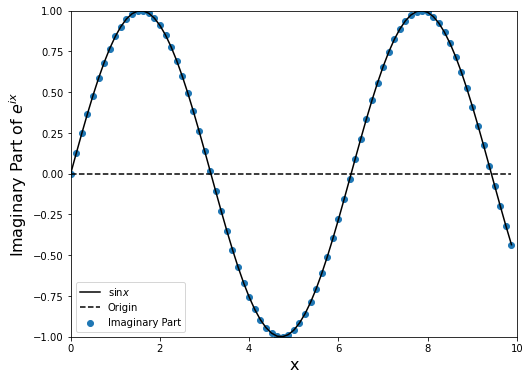

In [43]:
#Real part
plt.figure(figsize=(8,6))
t = np.arange(0, len(df3), 1)
plt.scatter(t/8, df3['e^x'].values.imag, label='Imaginary Part')
plt.plot(t/8, np.sin(t/8), color='black', label='$\sinx$')
plt.plot(t/8, 0*t, '--', color='black', label='Origin')
plt.xlabel('x', fontdict={'fontsize': 16})
plt.ylabel('Imaginary Part of $e^{ix}$', fontdict={'fontsize': 16})
plt.legend()
plt.ylim([-1,1])
plt.xlim([0,10])

(0.0, 10.0)

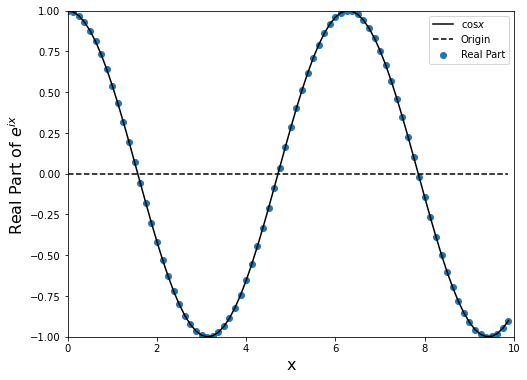

In [38]:
#Real part
plt.figure(figsize=(8,6))
t = np.arange(0, len(df3), 1)
plt.scatter(t/8, df3['e^x'].values.real, label='Real Part')
plt.plot(t/8, np.cos(t/8), color='black', label='$\cosx$')
plt.plot(t/8, 0*t, '--', color='black', label='Origin')
plt.xlabel('x', fontdict={'fontsize': 16})
plt.ylabel('Real Part of $e^{ix}$', fontdict={'fontsize': 16})
plt.legend()
plt.ylim([-1,1])
plt.xlim([0,10])

(0.0, 10.0)

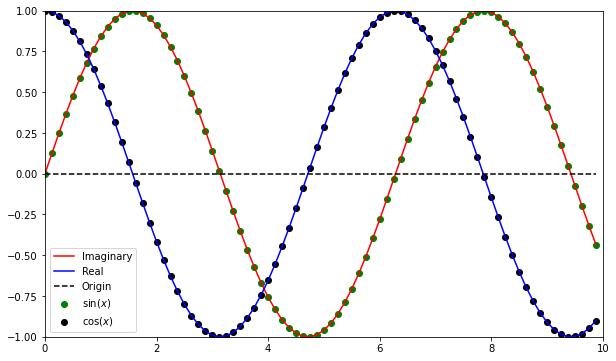

In [11]:
#Plotting the graph
plt.figure(figsize=(10,6))
t = np.arange(0, len(df3), 1)
plt.plot(t/8, df3['e^x'].values.imag, 'r', label = 'Imaginary')
plt.plot(t/8, df3['e^x'].values.real, 'b', label = 'Real')
plt.plot(t/8, 0*t, '--', color='black', label='Origin')
plt.scatter(t/8, np.sin(t/8),label='$\sin(x)$', color = 'green')
plt.scatter(t/8, np.cos(t/8),color='black', label='$\cos(x)$')
plt.legend()
plt.ylim([-1,1])
plt.xlim([0,10])

### Some Interactive Plots

In [12]:
#creating the DataFrame
X= df3['power']/8
data  = pd.DataFrame(data = [X], index = ['x']).transpose()
data['real'] = df3['e^x'].values.real
data['imaginary'] = df3['e^x'].values.imag

In [13]:
data

,x,real,imaginary
0,0.000,1.00000000,0.00000000
1,0.125,0.99219956,0.12467497
2,0.250,0.96891612,0.24740490
3,0.375,0.93051295,0.36627462
4,0.500,0.87758926,0.47942920
...,...,...,...
75,9.375,-0.99890422,0.04976453
76,9.500,-0.99731672,-0.07516201
77,9.625,-0.98016638,-0.19891615
78,9.750,-0.94772079,-0.31956673


In [14]:
t = data['x']
y = np.cos(t)
y2= np.sin(t)
fig = go.Figure(data=go.Scatter(x=t, y=y,mode='lines', line_color='black', name='cos(x)'))
fig.add_trace(go.Scatter(x=t, y=y2,mode='lines', line=dict(color="black"), name='sin(x)'))
fig.add_trace(go.Scatter(x=t, y=data['real'],mode='markers', line_color='red', name='Real Part'))
fig.add_trace(go.Scatter(x=t, y=data['imaginary'],mode='markers', line_color='blue', name='Imaginary Part'))
fig.update_layout(title='Plot of e^{ix}', xaxis_title='x')
fig.show()